In [ ]:

%pip install matplotlib pandas seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Display columns
print("Columns in dataset:", df.columns.tolist())

# Preview first 5 rows
df.head()

Columns in dataset: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_p

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[['total_cases', 'total_deaths', 'total_vaccinations', 'date', 'location']])

Missing values per column:
 total_cases            37997
total_deaths           59584
total_vaccinations    270777
date                       0
location                   0
dtype: int64


In [4]:
# Filter for specific countries
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)].copy()

# Convert date to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Handle missing values: fill numeric columns with 0
df_filtered['total_cases'] = df_filtered['total_cases'].fillna(0)
df_filtered['total_deaths'] = df_filtered['total_deaths'].fillna(0)
df_filtered['new_cases'] = df_filtered['new_cases'].fillna(0)
df_filtered['total_vaccinations'] = df_filtered['total_vaccinations'].fillna(0)

# Verify cleaning
print("Missing values after cleaning:\n", df_filtered[['total_cases', 'total_deaths', 'total_vaccinations']].isnull().sum())

Missing values after cleaning:
 total_cases           0
total_deaths          0
total_vaccinations    0
dtype: int64


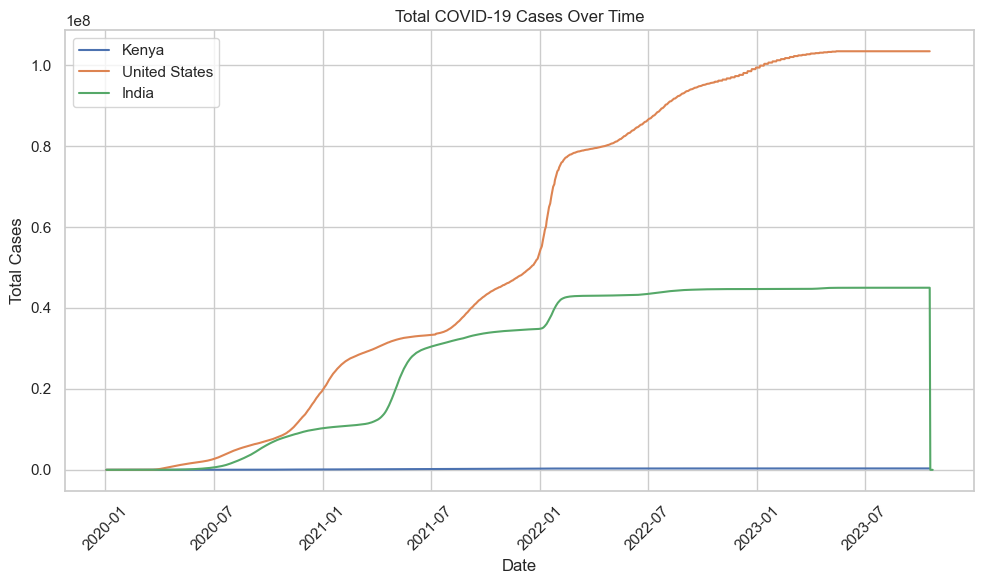

In [5]:

# Set plot style
sns.set(style="whitegrid")

# Plot total cases over time
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

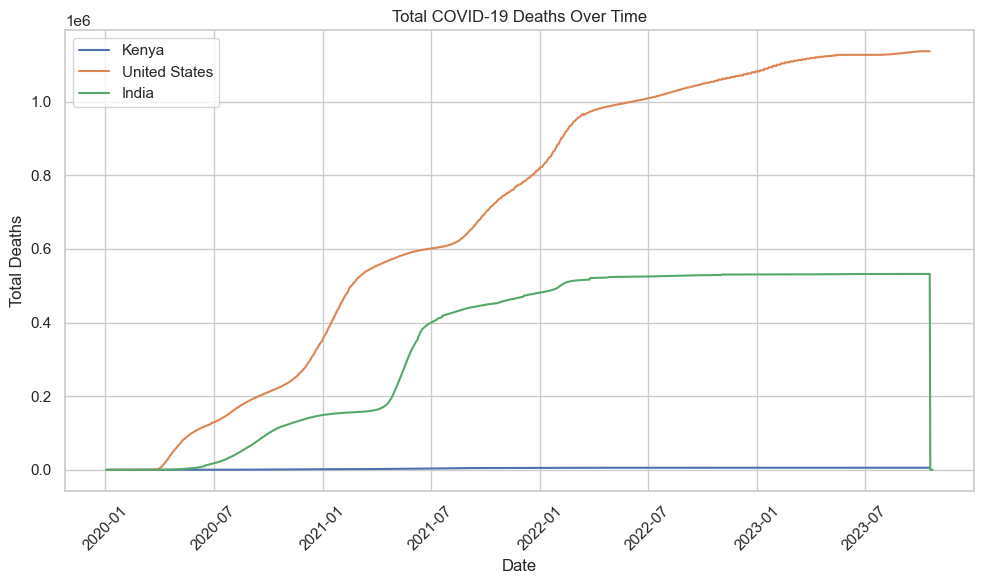

In [6]:
# Plot total deaths over time
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

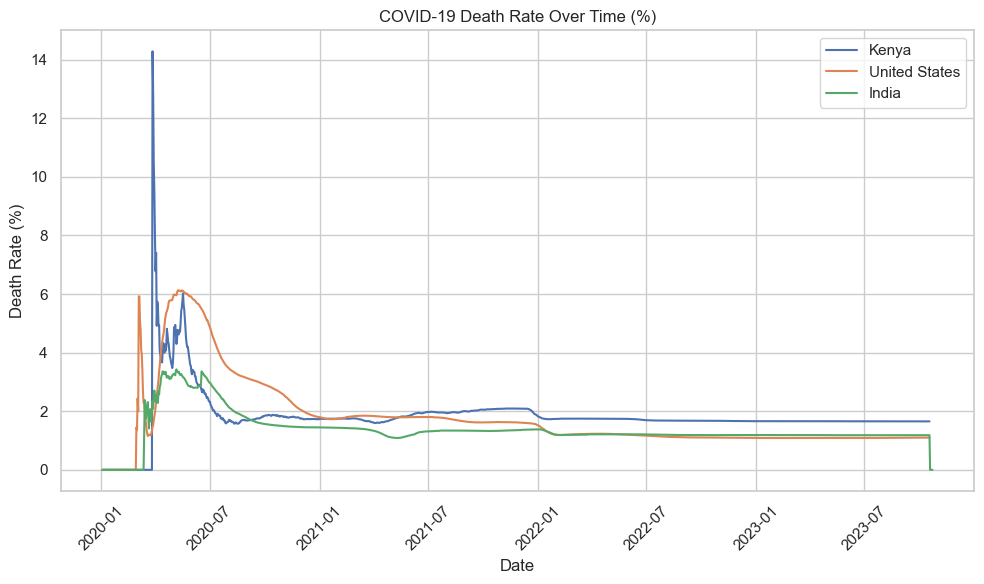

In [7]:
# Calculate death rate
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases'] * 100
df_filtered['death_rate'] = df_filtered['death_rate'].fillna(0)

# Plot death rate
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time (%)')
plt.xlabel('Date')
plt.ylabel('Death Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

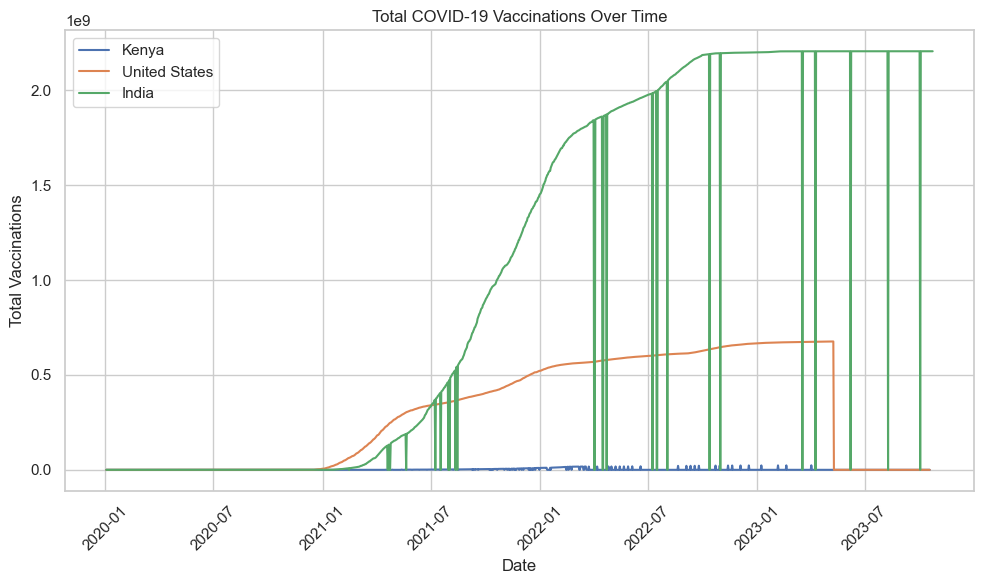

In [8]:
# Plot total vaccinations over time
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
#%pip install --upgrade kaleido

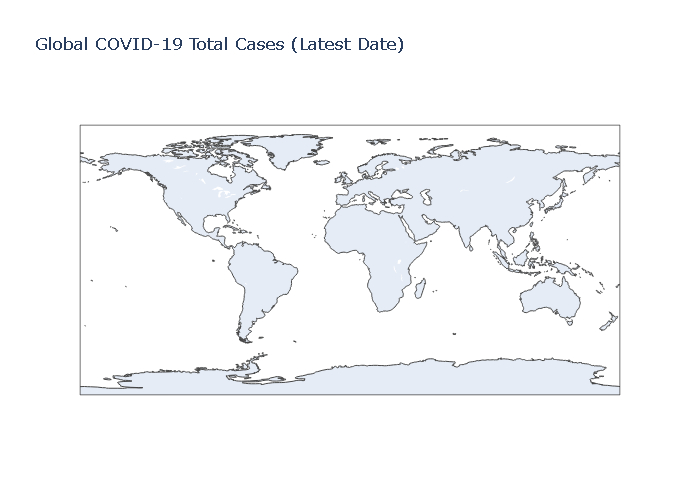

In [10]:
#%pip install plotly
#%pip install nbformat

import plotly.express as px

# Get the latest date for each country
latest_date = df['date'].max()
df_latest = df[df['date'] == latest_date][['location', 'iso_code', 'total_cases']].dropna()

# Create choropleth map
fig = px.choropleth(
    df_latest,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Global COVID-19 Total Cases (Latest Date)'
)
fig.show("png")
